# Analyse exploratoire des données

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Chargement

In [17]:
ratings = pd.read_csv("ratings.csv")
books = pd.read_csv("books.csv")
tags = pd.read_csv("tags.csv")
book_tags = pd.read_csv("book_tags.csv")
to_read = pd.read_csv("to_read.csv")

In [18]:
ratings.head(3)

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5


In [19]:
books.head(3)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...


In [20]:
tags.head(3)

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-


In [21]:
book_tags.head(3)

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173


In [22]:
to_read.head(3)

,user_id,book_id
0,9,8
1,15,398
2,15,275


Faisons des jointures entre les tables pour obtenir un seul et même dataframe

In [23]:
data = ratings.merge(books, how="inner", left_on=["book_id"], right_on=["book_id"])

In [24]:
to_read["to_read"] = 1

In [25]:
data = data.merge(to_read, how="left", left_on=["user_id", "book_id"], right_on=["user_id", "book_id"])

In [26]:
books_tags = book_tags.merge(tags, how="inner", left_on="tag_id", right_on="tag_id")
books_tags

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read
...,...,...,...,...
999907,31538635,14690,6,hogwarts
999908,32848471,16149,21,jan-2017
999909,33288638,27821,9,single-mom
999910,33288638,11478,7,fave-author


In [27]:
books_tags["tags"] = books_tags.groupby("goodreads_book_id")["tag_name"].transform(' '.join)
books_tags.drop(["tag_id", "tag_name", "count"], axis=1, inplace=True)
books_tags.drop_duplicates(inplace=True)
books_tags

,goodreads_book_id,tags
0,1,to-read fantasy favorites currently-reading yo...
1,2,to-read fantasy favorites currently-reading yo...
2,3,to-read fantasy favorites currently-reading yo...
3,5,to-read fantasy favorites currently-reading yo...
4,6,to-read fantasy young-adult fiction harry-pott...
...,...,...
23795,23503361,favorites currently-reading fiction books-i-ow...
23852,24473465,favorites books-i-own owned series owned-books...
33226,18943009,currently-reading books-i-own owned series fav...
63206,6644117,owned ya series favourites owned-books re-read...


In [28]:
data = data.merge(books_tags, how="left", left_on="goodreads_book_id", right_on="goodreads_book_id")
data

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,to_read,tags
0,1,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN,to-read fantasy favorites currently-reading fi...
1,11,258,3,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN,to-read fantasy favorites currently-reading fi...
2,143,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN,to-read fantasy favorites currently-reading fi...
3,242,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN,to-read fantasy favorites currently-reading fi...
4,325,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN,to-read fantasy favorites currently-reading fi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976474,36773,9548,5,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...,NaN,to-read favorites currently-reading young-adul...
5976475,50673,9548,4,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...,NaN,to-read favorites currently-reading young-adul...
5976476,45213,9548,3,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...,NaN,to-read favorites currently-reading young-adul...
5976477,12872,9548,4,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...,NaN,to-read favorites currently-reading young-adul...


Faisons un pivot table des users

In [29]:
ratings_mt = data.pivot("user_id", "book_id", "rating")
ratings_mt.head(5)

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,NaN,4.0,4.0,NaN,4.0,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data.dtypes

user_id                        int64
book_id                        int64
rating                         int64
goodreads_book_id              int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
to_read                      float64
tags                          object
d

Transformation de certaines colonnes pour remplacer les na par des valeurs par défaut

In [35]:
data['original_publication_year'].value_counts()

2012.0    271870
2011.0    261647
2005.0    233458
2009.0    226194
2008.0    218387
           ...  
1785.0       119
1677.0        97
1554.0        89
1380.0        75
1825.0        67
Name: original_publication_year, Length: 293, dtype: int64

In [32]:
data['to_read'].fillna(0, inplace=True)
data['isbn13'].fillna('', inplace=True)
data['isbn'].fillna('', inplace=True)

In [34]:
data.isna().sum()

user_id                           0
book_id                           0
rating                            0
goodreads_book_id                 0
best_book_id                      0
work_id                           0
books_count                       0
isbn                         212825
isbn13                            0
authors                           0
original_publication_year      5942
original_title               160910
title                             0
language_code                337020
average_rating                    0
ratings_count                     0
work_ratings_count                0
work_text_reviews_count           0
ratings_1                         0
ratings_2                         0
ratings_3                         0
ratings_4                         0
ratings_5                         0
image_url                         0
small_image_url                   0
to_read                           0
tags                              0
dtype: int64

## Analyse exploratoire

<AxesSubplot:>

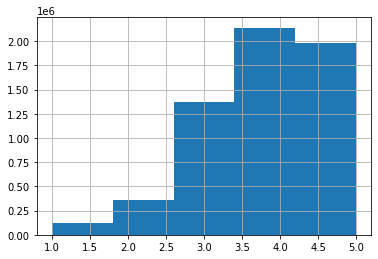

In [39]:
data['rating'].hist(bins=5)


In [77]:
data[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']].sum()

ratings_1      61167595055
ratings_2     117988862231
ratings_3     401379803465
ratings_4     743554178407
ratings_5    1040845090640
dtype: int64

([<matplotlib.axis.XTick at 0x2659c2f2040>,
 [Text(0, 0, 'ratings_1'),
  Text(1, 0, 'ratings_2'),
  Text(2, 0, 'ratings_3'),
  Text(3, 0, 'ratings_4'),
  Text(4, 0, 'ratings_5')])

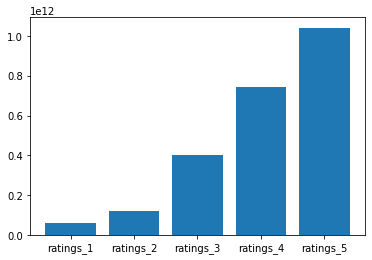

In [74]:
d = data[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']].sum().to_dict()
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))

Les votes